In [24]:
# Titanic 구현

import numpy as np
import pandas as pd
import tensorflow as tf

# Raw Data Loading
df = pd.read_csv('./data/titanic/train.csv')

# 학습에 필요하지 않은 column은 삭제할 꺼예요!
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], 
        axis=1, 
        inplace=True)
# display(df)

# 성별처리
gender_mapping = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(gender_mapping)

# 가족처리
df['Family'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
# display(df)

# 결측치 처리
# df.isnull().sum()
# Embarked 결측치 처리
df['Embarked'] = df['Embarked'].fillna('Q')
# Embarked 문자를 숫자로 변환
embarked_mapping = {'S': 0, 'C': 1, 'Q':2 }
df['Embarked'] = df['Embarked'].map(embarked_mapping)

# Age 결측치 처리
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Age Binning 처리(Numerical value -> Categorical value)
df.loc[df['Age'] < 8,'Age'] = 0
df.loc[(df['Age'] >= 8) & (df['Age'] < 20),'Age'] = 1
df.loc[(df['Age'] >= 20) & (df['Age'] < 65),'Age'] = 2
df.loc[df['Age'] >= 65,'Age'] = 3

# display(df.shape)

# 학습과 validation을 수행해야 해요!
# 데이터를 7:3 비율로 Training Data Set과 Validation Data Set으로 분리
train_data = df.iloc[:int(df.shape[0] * 0.7)]
val_data = df.iloc[int(df.shape[0] * 0.7):]

# Training Data Set
train_x_data = train_data.drop(['Survived'], axis=1, inplace=False).values
train_t_data = train_data['Survived'].values.reshape(-1,1)

# Validation Data Set
val_x_data = val_data.drop(['Survived'], axis=1, inplace=False).values
val_t_data = val_data['Survived'].values.reshape(-1,1)

#######################

# Tensorflow 구현

# placeholder
X = tf.placeholder(shape=[None,5], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weigth & bias
W = tf.Variable(tf.random.normal([5,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,
                                                              labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(300000):
    _, W_val, b_val, loss_val = sess.run([train,W,b,loss], 
                                         feed_dict={X: train_x_data,
                                                    T: train_t_data})
    if step % 30000 == 0:
        print('W:{}, b:{}. loss:{}'.format(W_val,b_val,loss_val))

W:[[-1.4967972 ]
 [-0.03792486]
 [-0.41562888]
 [ 0.21982834]
 [-0.16168778]], b:[1.0548507]. loss:1.152815818786621
W:[[-0.87440354]
 [ 0.38152933]
 [-0.07316253]
 [ 0.36812758]
 [ 0.08103679]], b:[1.311644]. loss:0.5705110430717468
W:[[-0.83586425]
 [ 0.65322506]
 [-0.16718248]
 [ 0.38920134]
 [ 0.04574085]], b:[1.3129617]. loss:0.5418277978897095
W:[[-0.81035674]
 [ 0.888716  ]
 [-0.2442977 ]
 [ 0.39935535]
 [ 0.01825808]], b:[1.316538]. loss:0.5208092927932739
W:[[-0.79276454]
 [ 1.093577  ]
 [-0.30599242]
 [ 0.40307942]
 [-0.00477334]], b:[1.3201143]. loss:0.5052330493927002
W:[[-0.78121054]
 [ 1.2722366 ]
 [-0.35571682]
 [ 0.40285277]
 [-0.02477746]], b:[1.325847]. loss:0.49355795979499817
W:[[-0.77428067]
 [ 1.4285889 ]
 [-0.39635184]
 [ 0.4003588 ]
 [-0.04229965]], b:[1.3329996]. loss:0.48470544815063477
W:[[-0.77017105]
 [ 1.565993  ]
 [-0.42967182]
 [ 0.39664158]
 [-0.05765163]], b:[1.3401521]. loss:0.4779244363307953
W:[[-0.7682901 ]
 [ 1.6871488 ]
 [-0.4572588 ]
 [ 0.392171

In [25]:
# 정확도(Accuracy) 측정
predict = tf.cast(H > 0.5, dtype=tf.float32)  # 예측값 : [1 0 0 0 1 0 1 0]
correct = tf.equal(predict, T) # T : [1 1 0 0 ..]   =>  [True, False, ...]  
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

accuracy_val = sess.run(accuracy, feed_dict={X:val_x_data,
                                             T:val_t_data})
print('모델의 정확도 : {}'.format(accuracy_val))

모델의 정확도 : 0.8097015023231506


W : [[-1.5673432   0.22421151  0.96775687]
 [ 2.2752674  -0.38507512  0.15501623]], b: [-0.4187101  -0.05168245  0.667728  ], loss: 1.6900830268859863
W : [[-1.5190388   0.24762881  0.8960301 ]
 [ 2.2598147  -0.36044452  0.14583491]], b: [-0.388477   -0.01523284  0.60104537], loss: 1.6378588676452637
W : [[-1.4729881   0.26796377  0.82964313]
 [ 2.2416742  -0.33811277  0.14162472]], b: [-0.36274457  0.01589958  0.54418063], loss: 1.5956288576126099
W : [[-1.4289236   0.28545937  0.7680863 ]
 [ 2.2213242  -0.31787583  0.14173953]], b: [-0.34083986  0.04219273  0.4959829 ], loss: 1.5610681772232056
W : [[-1.3865993   0.3003918   0.71082604]
 [ 2.1991343  -0.29951534  0.14556466]], b: [-0.322154    0.06415936  0.4553303 ], loss: 1.5322961807250977
W : [[-1.3457693   0.31304684  0.6573419 ]
 [ 2.1754491  -0.28281277  0.15254001]], b: [-0.30615667  0.08231044  0.42118213], loss: 1.5078457593917847
W : [[-1.3062401   0.32370266  0.6071538 ]
 [ 2.1506262  -0.26756167  0.16216992]], b: [-0.292

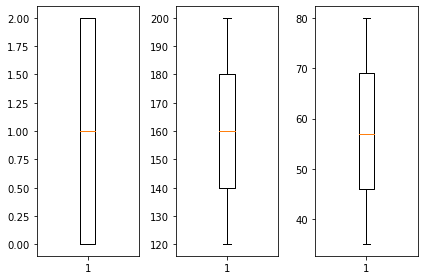

In [39]:
# Multinomial Classification
# %reset

# Tensorflow로 구현해 보아요!
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Raw Data Loading
df = pd.read_csv('./data/bmi/bmi.csv', skiprows=3)

# display(df.head(), df.shape)

### 결측치 처리 ###
# df.isnull().sum()   # 결측치가 존재하지 않아요!

### 이상치 처리 ###
fig = plt.figure()
fig_1 = fig.add_subplot(1,3,1)
fig_2 = fig.add_subplot(1,3,2)
fig_3 = fig.add_subplot(1,3,3)

fig_1.boxplot(df['label'])
fig_2.boxplot(df['height'])
fig_3.boxplot(df['weight'])

fig.tight_layout()
# plt.show()

### boxplot을 이용해서 이상치가 존재하는지를 확인해요!!
### 이상치는 현재 존재하지 않아요!

### Training Data Set
x_data = df[['height', 'weight']].values
t_data = df['label'].values  # one hot encoding으로 변환
###      [0 1 2 0 1 1 2 2 0 1]
###      [[1 0 0]
###       [0 1 0]
###       [0 0 1]
###       [1 0 0]]

### 정규화
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)
norm_x_data = scaler_x.transform(x_data)
# print(norm_x_data)

### tensorflow 기능을 이용해서 one hot encoding을 생성
sess = tf.Session()
norm_t_data = sess.run(tf.one_hot(t_data, depth=3))
# print(norm_t_data)

## training data set 준비 끝

## tensorflow 구현
# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
T = tf.placeholder(shape=[None,3], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([2,3]), name='weight')
b = tf.Variable(tf.random.normal([3]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)   # Softmax Activation function 이용

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# 초기화
sess.run(tf.global_variables_initializer())

# 학습진행
for step in range(30000):
    _, W_val, b_val, loss_val = sess.run([train,W,b,loss], 
                                         feed_dict={X:norm_x_data,
                                                    T:norm_t_data})
    if step % 3000 == 0:
        print('W : {}, b: {}, loss: {}'.format(W_val, b_val, loss_val))
        
        

In [41]:
# 잘 만들어진 모델인지 확인하고 넘어가야 해요!(train, validation)

# prediction
height = 187
weight = 78
my_state = [[height, weight]]

result = sess.run(H, feed_dict={X:scaler_x.transform(my_state)})
print(result)  # 2 => 과체중 ?? 확인을 해 봐야 해요!

[[0.3605289  0.21609014 0.42338097]]
